In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.1)

# Загрузка Boston Housing из OpenML
boston = fetch_openml(data_id=531, as_frame=True )#, parser='auto')
df = boston.frame
df.columns = df.columns.str.lower()  # Приводим к нижнему регистру

print(f"Датасет: {df.shape[0]} строк × {df.shape[1]} столбцов")
print("\nЦелевая переменная:", boston.target_names)

Датасет: 506 строк × 14 столбцов

Целевая переменная: ['MEDV']


Boston Housing — это классический датасет для задач регрессии, доступный на платформе OpenML (идентификатор 531). Он содержит данные о 506 жилых объектах в пригородах Бостона (США), собранные в 1970-х годах на основе переписи и других источников.

Описание датасета
Датасет включает 13 признаков (features), описывающих характеристики районов и домов, и одну целевую переменную — медианную цену домов (MEDV) в тысячах долларов. Цель — предсказывать цену на основе факторов вроде преступности, количества комнат и экологии. Общий размер: 506 строк × 14 столбцов (13 входных + 1 выходная).
​

Признаки (Features)
CRIM: Уровень преступности на душу населения по городам.

ZN: Доля жилой земли, зонированной под участки >25 000 кв. футов.

INDUS: Доля акров нежилой застройки по городам.

CHAS: Дамми-переменная для реки Чарльз (1, если район граничит с рекой).

NOX: Концентрация оксидов азота (частей на 10 млн).

RM: Среднее количество комнат в доме.

AGE: Доля домов владельцев, построенных до 1940 г.

DIS: Взвешенное расстояние до 5 центров занятости Бостона.

RAD: Индекс доступности радиальных скоростных дорог.

TAX: Ставка налога на имущество на $10 000 полной стоимости.

PTRATIO: Соотношение учеников к учителям по городам.

B: 1000*(Bk - 0.63)^2, где Bk — доля чернокожих жителей.

LSTAT: Доля населения с низким статусом (нижние 25% дохода).
​

Целевая переменная
MEDV: Медианная цена домов для владельцев в $1000's (от 5 до 50). Датасет популярен для бенчмаркинга моделей регрессии, но содержит потенциально проблемные признаки (например, B и LSTAT, связанные с демографией).

In [3]:
print(df)

        crim    zn  indus chas    nox     rm   age     dis rad    tax  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [4]:
df.head()
df.info()
df.describe()

# Целевая переменная — medv (median value, медианная стоимость дома в $1000)
print("\nРаспределение целевой переменной (цена):")
print(df['medv'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     506 non-null    float64 
 1   zn       506 non-null    float64 
 2   indus    506 non-null    float64 
 3   chas     506 non-null    category
 4   nox      506 non-null    float64 
 5   rm       506 non-null    float64 
 6   age      506 non-null    float64 
 7   dis      506 non-null    float64 
 8   rad      506 non-null    category
 9   tax      506 non-null    float64 
 10  ptratio  506 non-null    float64 
 11  b        506 non-null    float64 
 12  lstat    506 non-null    float64 
 13  medv     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB

Распределение целевой переменной (цена):
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dt

Корреляция признаков с ценой (MEDV):
medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
age       -0.376955
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


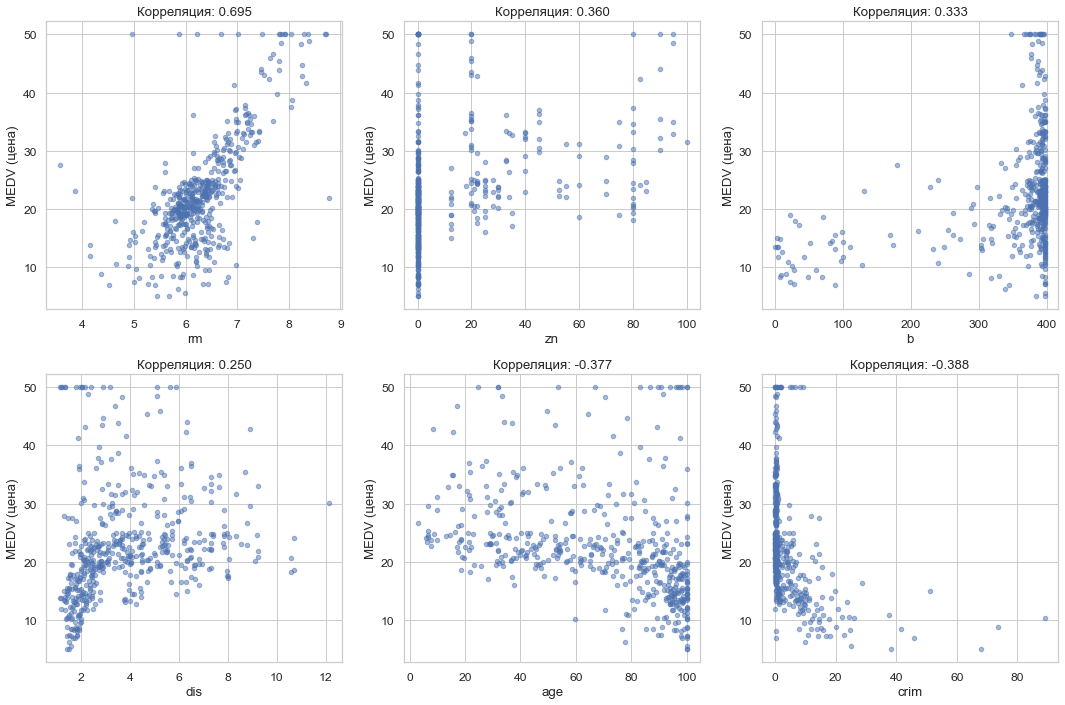

In [5]:
# Находим признаки с сильной корреляцией
target_corr = df.corr()['medv'].sort_values(ascending=False)
print("Корреляция признаков с ценой (MEDV):")
print(target_corr)

# Визуализация топ-6 признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
top_features = target_corr.index[1:7]  # Пропускаем сам medv

for i, feature in enumerate(top_features):
    ax = axes[i // 3, i % 3]
    ax.scatter(df[feature], df['medv'], alpha=0.5, s=20)
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV (цена)')
    ax.set_title(f'Корреляция: {target_corr[feature]:.3f}')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TODO: выберите один признак для простой регрессии (например, 'rm' или 'lstat')
feature = 'rm'   # Количество комнат

X = df[[feature]].values  # Двойные скобки → DataFrame → 2D массив
y = df['medv'].values

# TODO: разбейте на train/test (80/20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение модели
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

print(f"Коэффициент (наклон): {model_linear.coef_[0]:.3f}")
print(f"Свободный член (intercept): {model_linear.intercept_:.3f}")
print(f"Уравнение: цена = {model_linear.coef_[0]:.3f} × {feature} + {model_linear.intercept_:.3f}")

Коэффициент (наклон): 9.348
Свободный член (intercept): -36.246
Уравнение: цена = 9.348 × rm + -36.246


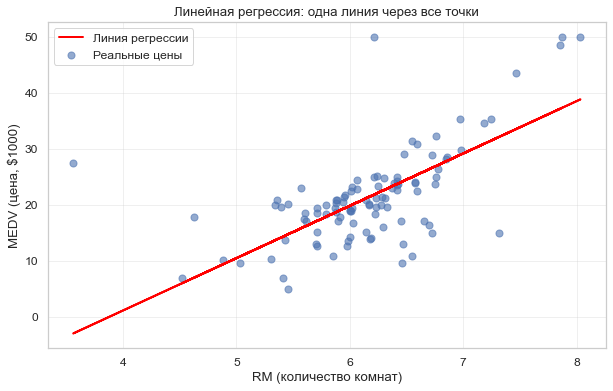

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.6, s=50, label='Реальные цены')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Линия регрессии')
plt.xlabel(f'{feature.upper()} (количество комнат)')
plt.ylabel('MEDV (цена, $1000)')
plt.title('Линейная регрессия: одна линия через все точки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
MSE = 43.6  → "Квадрат ошибки. Большие промахи наказываются сильно."
              Единицы: (тысяча долларов)² — неудобно для интерпретации.

RMSE = 6.6  → "Корень из MSE. Возвращает в исходные единицы."
              Модель ошибается в среднем на $6.6k (с учётом больших ошибок).

MAE = 4.8   → "Средняя абсолютная ошибка. Самая интуитивная метрика."
              Если вы предсказываете цену 100 раз, средний промах = $4.8k.

R² = 0.48   → "Доля объяснённой дисперсии. R² = 1.0 → идеально."
              0.48 → модель объясняет 48% вариации цен. Остальные 52% —
              это влияние других факторов (район, год постройки и т.д.).

In [12]:
# TODO: вычислите метрики
mse = mean_squared_error(y_test, y_pred)      # y_test, y_pred
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("="*50)
print("МЕТРИКИ КАЧЕСТВА МОДЕЛИ")
print("="*50)
print(f"MSE  (Mean Squared Error):      {mse:.3f}")
print(f"RMSE (Root MSE):                {rmse:.3f}  ← в тех же единицах, что и цена")
print(f"MAE  (Mean Absolute Error):     {mae:.3f}  ← средняя ошибка в $1000")
print(f"R²   (коэффициент детерминации): {r2:.3f}  ← доля объяснённой дисперсии")
print("="*50)

# Человеческая интерпретация
print(f"\n📊 Интерпретация:")
print(f"   Модель ошибается в среднем на ${mae:.1f}k (MAE)")
print(f"   R² = {r2:.2%} → модель объясняет {r2:.0%} вариации цен")

МЕТРИКИ КАЧЕСТВА МОДЕЛИ
MSE  (Mean Squared Error):      46.145
RMSE (Root MSE):                6.793  ← в тех же единицах, что и цена
MAE  (Mean Absolute Error):     4.478  ← средняя ошибка в $1000
R²   (коэффициент детерминации): 0.371  ← доля объяснённой дисперсии

📊 Интерпретация:
   Модель ошибается в среднем на $4.5k (MAE)
   R² = 37.08% → модель объясняет 37% вариации цен


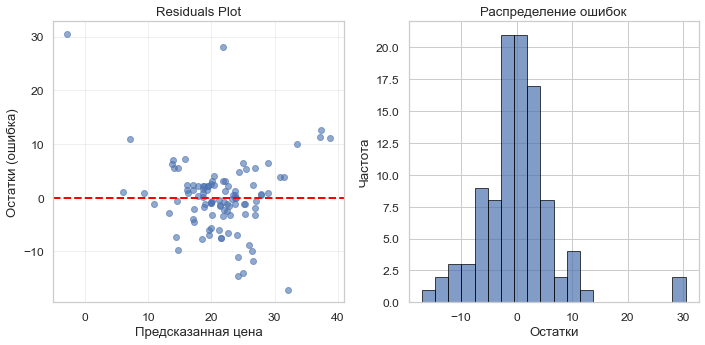

Если остатки распределены случайно вокруг 0 → модель хороша.
Если видна структура (паттерн) → модель что-то упускает.


In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки (ошибка)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.tight_layout()
plt.show()

print(f"Если остатки распределены случайно вокруг 0 → модель хороша.")
print(f"Если видна структура (паттерн) → модель что-то упускает.")

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Создаём признаки: x, x²
poly_model_2 = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)

poly_model_2.fit(X_train, y_train)
y_pred_poly2 = poly_model_2.predict(X_test)

# Метрики
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
mae_poly2 = mean_absolute_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

print("Полином степени 2:")
print(f"  MAE:  {mae_poly2:.3f}  (было {mae:.3f})")
print(f"  RMSE: {np.sqrt(mse_poly2):.3f}  (было {rmse:.3f})")
print(f"  R²:   {r2_poly2:.3f}  (было {r2:.3f})")

Полином степени 2:
  MAE:  4.158  (было 4.478)
  RMSE: 5.947  (было 6.793)
  R²:   0.518  (было 0.371)


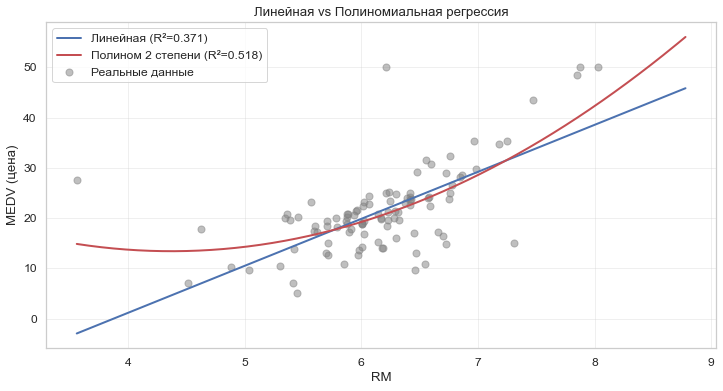

In [14]:
# Создаём плавную кривую для визуализации
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_linear = model_linear.predict(X_range)
y_poly2 = poly_model_2.predict(X_range)

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, alpha=0.5, s=50, label='Реальные данные', color='gray')
plt.plot(X_range, y_linear, 'b-', linewidth=2, label=f'Линейная (R²={r2:.3f})')
plt.plot(X_range, y_poly2, 'r-', linewidth=2, label=f'Полином 2 степени (R²={r2_poly2:.3f})')
plt.xlabel(f'{feature.upper()}')
plt.ylabel('MEDV (цена)')
plt.title('Линейная vs Полиномиальная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
degrees = [1, 2, 3, 5, 10]
results = []

for d in degrees:
    if d == 1:
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred_temp = model.predict(X_test)
    else:
        model = make_pipeline(PolynomialFeatures(d), LinearRegression())
        model.fit(X_train, y_train)
        y_pred_temp = model.predict(X_test)
    
    mse_temp = mean_squared_error(y_test, y_pred_temp)
    mae_temp = mean_absolute_error(y_test, y_pred_temp)
    r2_temp = r2_score(y_test, y_pred_temp)
    
    results.append({
        'degree': d,
        'MAE': mae_temp,
        'RMSE': np.sqrt(mse_temp),
        'R²': r2_temp
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

 degree       MAE       RMSE        R²
      1  4.478336   6.792995  0.370757
      2  4.158013   5.947249  0.517688
      3  4.081312   5.869004  0.530296
      5  3.877796   5.702171  0.556620
     10  5.031251  12.340936 -1.076788


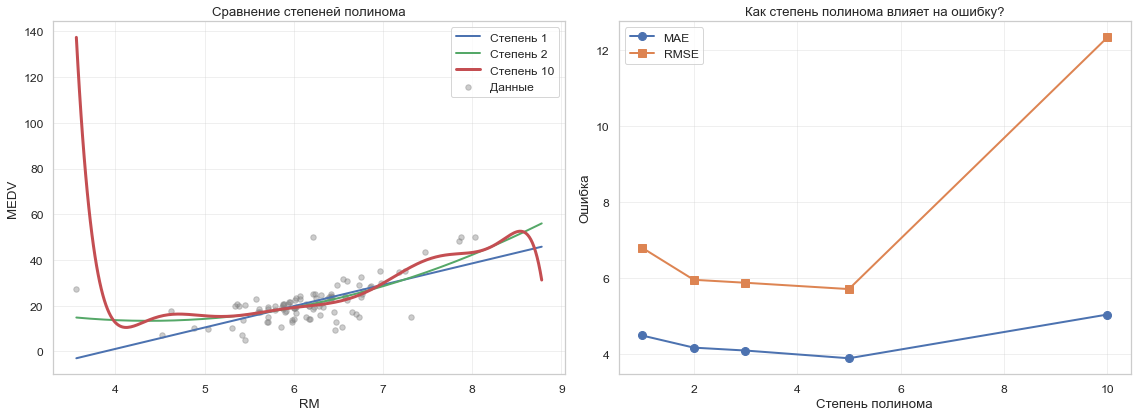

In [16]:
poly_model_10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
poly_model_10.fit(X_train, y_train)
y_poly10 = poly_model_10.predict(X_range)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: все степени на одном графике
axes[0].scatter(X_test, y_test, alpha=0.4, s=30, label='Данные', color='gray')
axes[0].plot(X_range, y_linear, 'b-', linewidth=2, label='Степень 1')
axes[0].plot(X_range, y_poly2, 'g-', linewidth=2, label='Степень 2')
axes[0].plot(X_range, y_poly10, 'r-', linewidth=3, label='Степень 10')
axes[0].set_xlabel(feature.upper())
axes[0].set_ylabel('MEDV')
axes[0].set_title('Сравнение степеней полинома')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График 2: метрики vs степень
axes[1].plot(results_df['degree'], results_df['MAE'], 'o-', linewidth=2, markersize=8, label='MAE')
axes[1].plot(results_df['degree'], results_df['RMSE'], 's-', linewidth=2, markersize=8, label='RMSE')
axes[1].set_xlabel('Степень полинома')
axes[1].set_ylabel('Ошибка')
axes[1].set_title('Как степень полинома влияет на ошибку?')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
Степень | Параметров | Train R² | Test R² | Интерпретация
--------|-----------|----------|---------|---------------
1       | 2         | ~0.48    | ~0.48   | Недообучение (underfitting)
2       | 3         | ~0.52    | ~0.52   | Хороший баланс
3       | 4         | ~0.54    | ~0.53   | Ещё лучше
5       | 6         | ~0.58    | ~0.50   | Начало переобучения
10      | 11        | ~0.70    | ~0.40   | Переобучение (overfitting)

In [17]:
# TODO: выберите 3-5 признаков с сильной корреляцией
features = ['rm', 'lstat', 'ptratio']  # Пример: комнаты, бедность, соотношение учеников/учителей

X_multi = df[features].values
y = df['medv'].values

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_multi = model_multi.predict(X_test_m)

# Метрики
mae_multi = mean_absolute_error(y_test_m, y_pred_multi)
r2_multi = r2_score(y_test_m, y_pred_multi)

print(f"Множественная регрессия ({len(features)} признаков):")
print(f"  MAE:  {mae_multi:.3f}")
print(f"  R²:   {r2_multi:.3f}")
print(f"\nКоэффициенты:")
for feat, coef in zip(features, model_multi.coef_):
    print(f"  {feat:10s}: {coef:+7.3f}")

Множественная регрессия (3 признаков):
  MAE:  3.333
  R²:   0.630

Коэффициенты:
  rm        :  +4.933
  lstat     :  -0.567
  ptratio   :  -0.867


In [18]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(model_multi, X_multi, y, cv=5, 
                            scoring='neg_mean_absolute_error')
cv_mae = -cv_scores  # Инвертируем знак (sklearn возвращает negative MAE)

print("5-Fold Cross-Validation:")
print(f"  MAE по фолдам: {cv_mae}")
print(f"  Средний MAE: {cv_mae.mean():.3f} ± {cv_mae.std():.3f}")
print(f"\nЭто более надёжная оценка, чем одно разбиение train/test.")

5-Fold Cross-Validation:
  MAE по фолдам: [2.52731981 3.85176449 4.40661674 5.16832848 4.25877559]
  Средний MAE: 4.043 ± 0.869

Это более надёжная оценка, чем одно разбиение train/test.
